#### Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Reading data

In [2]:
bank = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/bank-full.csv', header = 0, sep = ';')

In [3]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


#### Exploring the data 

In [4]:
#To check null data
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


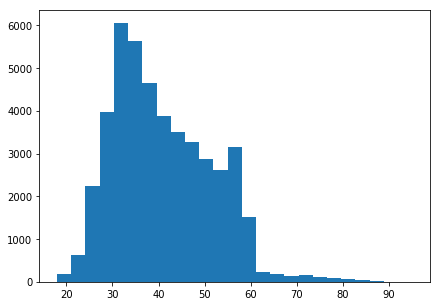

In [6]:
plt.figure(figsize = (7,5))
plt.hist(bank['age'], bins = 25, histtype = 'barstacked')
plt.show()

In [7]:
#Maximum records are present for age group between 20 to 50

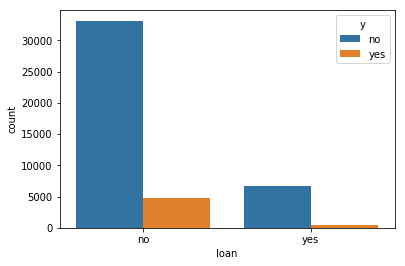

In [8]:
sns.countplot(x= bank['loan'], hue = bank['y'])

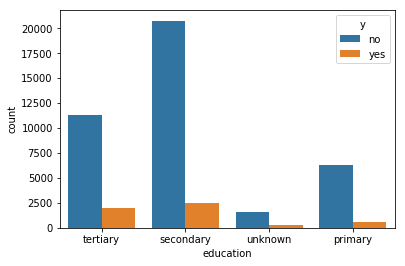

In [9]:
sns.countplot(x= bank['education'], hue = bank['y'])

In [10]:
####The values of yes and no show huge difference

#### Feature selection and feature engineering

In [11]:
from sklearn.feature_selection import chi2

In [12]:
cat_bank_data = bank.select_dtypes(include = 'object')

In [13]:
cat_bank_data.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


In [14]:
from sklearn.preprocessing import OrdinalEncoder

In [15]:
oe = OrdinalEncoder()

In [16]:
df = oe.fit_transform(cat_bank_data)

In [17]:
df = pd.DataFrame(df, columns=list(cat_bank_data.columns.values))

In [18]:
df.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,4.0,1.0,2.0,0.0,1.0,0.0,2.0,8.0,3.0,0.0
1,9.0,2.0,1.0,0.0,1.0,0.0,2.0,8.0,3.0,0.0
2,2.0,1.0,1.0,0.0,1.0,1.0,2.0,8.0,3.0,0.0
3,1.0,1.0,3.0,0.0,1.0,0.0,2.0,8.0,3.0,0.0
4,11.0,2.0,3.0,0.0,0.0,0.0,2.0,8.0,3.0,0.0


In [19]:
bank.drop(columns = list(cat_bank_data.columns.values), axis = 1, inplace = True)

In [20]:
bank = pd.concat([bank, df], axis = 1)

In [21]:
bank.head()

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,58,2143,5,261,1,-1,0,4.0,1.0,2.0,0.0,1.0,0.0,2.0,8.0,3.0,0.0
1,44,29,5,151,1,-1,0,9.0,2.0,1.0,0.0,1.0,0.0,2.0,8.0,3.0,0.0
2,33,2,5,76,1,-1,0,2.0,1.0,1.0,0.0,1.0,1.0,2.0,8.0,3.0,0.0
3,47,1506,5,92,1,-1,0,1.0,1.0,3.0,0.0,1.0,0.0,2.0,8.0,3.0,0.0
4,33,1,5,198,1,-1,0,11.0,2.0,3.0,0.0,0.0,0.0,2.0,8.0,3.0,0.0


In [22]:
chi_2, pval = chi2(df.drop(columns=['y']), df.y)

In [23]:
feature_importances = pd.Series(chi_2, index=list(df.drop(columns=['y']).columns.values))

In [24]:
feature_importances.sort_values(ascending=False)

contact      1253.814109
housing       388.949715
job           182.452260
loan          176.516137
poutcome      104.677479
education      90.617723
month          44.321905
marital        29.766067
default        22.313875
dtype: float64

In [25]:
#We will remove marital and default feature while considering our data

#### Modelling

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [28]:
feature = bank.drop(columns = ['y','marital','default'], axis = 1)

In [29]:
target = bank['y']

In [30]:
trainX, testX, trainY, testY = train_test_split(feature, target)

In [31]:
lr = LogisticRegression()

In [32]:
lr.fit(trainX,trainY)

C:\Users\chaitali.acharya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [33]:
y_pred_lr = lr.predict(testX)

In [34]:
lr.score(testX,testY)

0.8852517030876759

In [35]:
from sklearn.metrics import confusion_matrix
conf_mat_lr = confusion_matrix(y_pred=y_pred_lr, y_true=testY)

In [36]:
pd.DataFrame(conf_mat_lr, columns=['Predicted_0', 'Predicted_1'], index=['Actual_0', 'Actual_1'])

,Predicted_0,Predicted_1
Actual_0,9802,174
Actual_1,1123,204


In [37]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [38]:
dt.fit(trainX, trainY)

DecisionTreeClassifier()

In [39]:
dt.score(testX, testY)

0.8771122710784748

In [40]:
y_pred_dt = dt.predict(testX)

In [41]:
conf_mat_dt = confusion_matrix(y_pred=y_pred_dt, y_true=testY)

In [43]:
pd.DataFrame(conf_mat_dt, columns=['Predicted_0', 'Predicted_1'], index=['Actual_0', 'Actual_1'])

,Predicted_0,Predicted_1
Actual_0,9243,733
Actual_1,656,671


In [44]:
bank['y'].value_counts()

0.0    39922
1.0     5289
Name: y, dtype: int64

In [ ]:
#looks like we have a class imblance

#### Balancing the classes

In [45]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [46]:
sampler = RandomOverSampler()

In [47]:
feature_s, target_s = sampler.fit_sample(feature, target)

#### Applying logistic regression and decision tree

In [48]:
lr = LogisticRegression()

In [49]:
trainX, testX, trainY, testY = train_test_split(feature_s, target_s)

In [50]:
lr.fit(trainX, trainY)

C:\Users\chaitali.acharya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [51]:
y_pred_s = lr.predict(testX)

In [52]:
conf_mat_lrs= confusion_matrix(y_pred=y_pred_s, y_true=testY)

In [53]:
pd.DataFrame(conf_mat_lrs, columns=['Predicted_0', 'Predicted_1'], index=['Actual_0', 'Actual_1'])

,Predicted_0,Predicted_1
Actual_0,7906,2066
Actual_1,2621,7368


In [61]:
lr.score(testX,testY)

0.765192124643054

In [54]:
dtree = DecisionTreeClassifier()

In [55]:
trainX_d, testX_d, trainY_d, testY_d = train_test_split(feature_s, target_s)

In [56]:
dtree.fit(trainX_d,trainY_d)

DecisionTreeClassifier()

In [57]:
pred = dtree.predict(testX_d)

In [58]:
conf_mat_dtree = confusion_matrix(y_pred=pred, y_true=testY)

In [59]:
pd.DataFrame(conf_mat_dtree, columns=['Predicted_0', 'Predicted_1'], index=['Actual_0', 'Actual_1'])

,Predicted_0,Predicted_1
Actual_0,4656,5316
Actual_1,4515,5474


In [60]:
dtree.score(testX_d, testY_d)

0.9596713591503432

In [63]:
smote  = SMOTE()

In [64]:
feature_sm, target_sm = smote.fit_sample(feature, target)

In [77]:
trainX_lsm, testX_lsm, trainY_lsm, testY_lsm = train_test_split(feature_sm, target_sm)

In [67]:
lr_sm = LogisticRegression()

In [78]:
lr_sm.fit(trainX_lsm, trainY_lsm)

C:\Users\chaitali.acharya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [79]:
lr_sm.score(testX_lsm,testY_lsm)

0.7787685987675969

In [80]:
pred_sm = lr_sm.predict(testX_lsm)

In [81]:
conf_mat_lr_sm = confusion_matrix(y_pred=pred_sm, y_true=testY_lsm)

In [82]:
pd.DataFrame(conf_mat_lr_sm, columns=['Predicted_0', 'Predicted_1'], index=['Actual_0', 'Actual_1'])

,Predicted_0,Predicted_1
Actual_0,7933,2078
Actual_1,2338,7612


In [73]:
#using decision tree

In [74]:
dtree_sm = DecisionTreeClassifier()

In [83]:
trainX_dsm, testX_dsm, trainY_dsm, testY_dsm = train_test_split(feature_sm, target_sm)

In [91]:
dtree_sm.fit(trainX_dsm,trainY_dsm )

DecisionTreeClassifier()

In [92]:
pred_dt_sm = dtree_sm.predict(testX_dsm)

In [93]:
conf_mat_dt_sm = confusion_matrix(y_pred=pred_dt_sm, y_true=testY_dsm)

In [94]:
pd.DataFrame(conf_mat_dt_sm, columns=['Predicted_0', 'Predicted_1'], index=['Actual_0', 'Actual_1'])

,Predicted_0,Predicted_1
Actual_0,9156,859
Actual_1,738,9208


In [95]:
dtree_sm.score(testX_dsm,testY_dsm )

0.9199939882771404